# Indexing, Selection, and Filtering

In [42]:
import pandas as pd
import numpy as np



In [43]:
data = pd.DataFrame(np.arange(16).reshape((4,4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one','two','three','four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [44]:
data[:2] #pasar dos elementos es para seleccionar un slice de filas

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [45]:
data['two'] #pasar el nombre de la columna es para seleccionar columna

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [46]:
data[data['three']> 5]  

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [47]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [48]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### Selection with loc and iloc
podemos seleccionar las filas y columnas que queramos ver

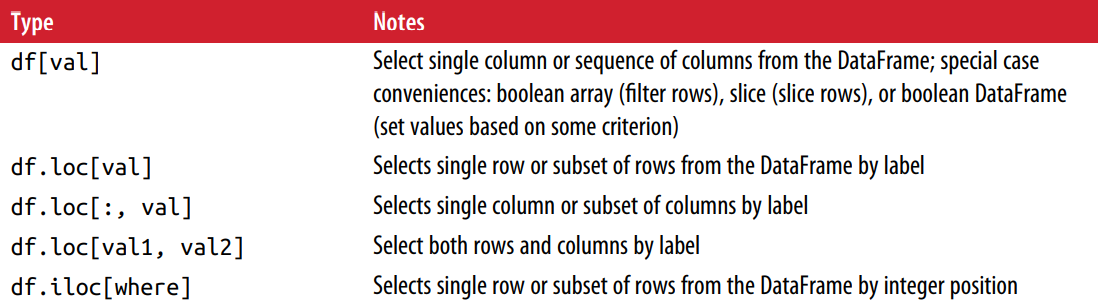
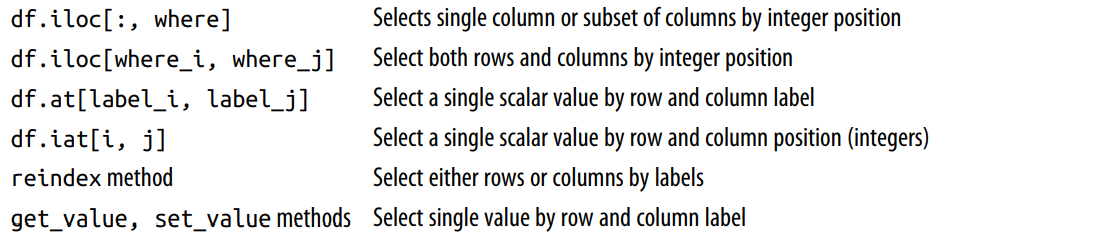

In [49]:
data.loc['Colorado', ['two', 'three']] #aca podemos seleccionar la fila, y las columnas que queremos
                                        #ver

two      5
three    6
Name: Colorado, dtype: int32

In [50]:
data.iloc[[1,2],[3,0,1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [51]:
data.iloc[:,:3][data.three > 0]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


### Reindexing
Calling reindex on this Series rearranges the data according to the new index, intro‐
ducing missing values if any index values were not already present. 
It returns a copy of the data base
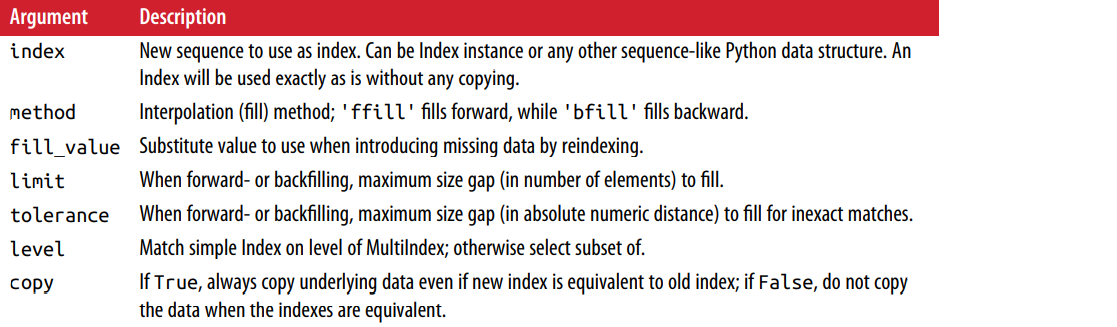

In [52]:
data.reindex(['Ohio', 'Colorado', 'Medellin', 'New York'])

,one,two,three,four
Ohio,0.0,0.0,0.0,0.0
Colorado,0.0,5.0,6.0,7.0
Medellin,NaN,NaN,NaN,NaN
New York,12.0,13.0,14.0,15.0


# Dropping Entries from an Axis

In [53]:
data1= pd.DataFrame(np.arange(16).reshape((4,4)),index=['Ohio', 'Colorado', 'Utah', 'New York'],columns=['one', 'two', 'three', 'four'])
data1

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Eliminando filas

In [54]:
data1.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


Eliminando columnas

In [55]:
data.drop(['two', 'four'], axis=1)

,one,three
Ohio,0,0
Colorado,0,6
Utah,8,10
New York,12,14


si utilizamos la función drop elimina y realiza una copia para asignar, si usamos el parametro inplace 
se realiza la eliminación en el dataframe original

In [57]:
data.drop(['two', 'four'], axis='columns', inplace=True)

In [58]:
data

,one,three
Ohio,0,0
Colorado,0,6
Utah,8,10
New York,12,14


# Arithmetic and Data Alignment

## Arithmetic methods with fill values

si se realiza una operación de dos dataframes que no tengan alguna fila o columna en comun los datos se llenaran con NaN, en este caso contamos con las siguientes funciones
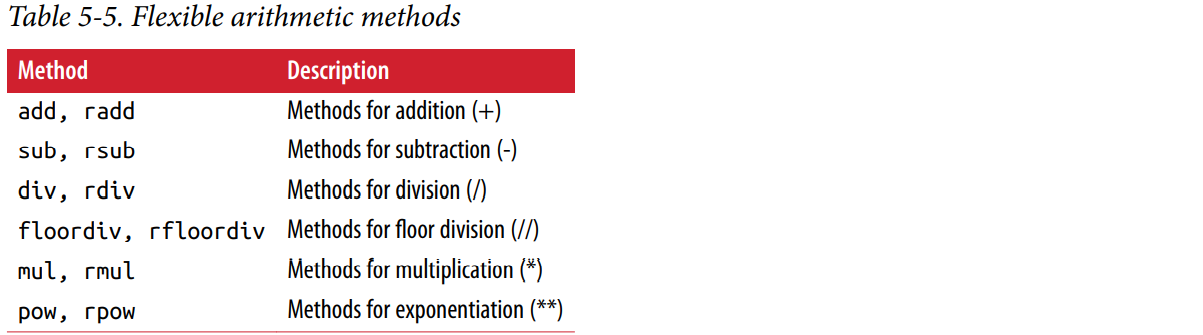

In [16]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),columns=list('abcde'))

In [17]:
df1+df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [18]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


## Operations between DataFrame and Series
By default, arithmetic between DataFrame and Series matches the index of the Series
on the DataFrame’s columns, broadcasting down the rows.  
If an index value is not found in either the DataFrame’s columns or the Series’s index,
the objects will be reindexed to form the union.

In [62]:
serie = df1.iloc[0]
serie["e"]=4
serie

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
Name: 0, dtype: float64

In [63]:
df1-serie

,a,b,c,d,e
0,0.0,0.0,0.0,0.0,NaN
1,4.0,4.0,4.0,4.0,NaN
2,8.0,8.0,8.0,8.0,NaN


# Function Application and Mapping
NumPy ufuncs (element-wise array methods) also work with pandas objects

In [66]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),index=['Utah', 'Ohio', 'Texas', 'Oregon'])
np.abs(frame)

,b,d,e
Utah,2.165709,0.861663,0.578401
Ohio,0.347126,2.458215,1.294742
Texas,0.351240,2.061498,0.334373
Oregon,0.748572,0.624969,0.651813


Another frequent operation is applying a function on one-dimensional arrays to each
column or row. DataFrame’s **apply** method does exactly this

In [74]:
f = lambda x: x.max() - x.min()
rows = frame.apply(f)
columns = frame.apply(f, axis='columns')
rows

b    2.516950
d    4.519713
e    1.629115
dtype: float64

If you pass axis='columns' to apply, the function will be invoked once per row
instead:

In [75]:
columns

Utah      3.027373
Ohio      2.805341
Texas     1.727125
Oregon    0.123603
dtype: float64

In [76]:
func = lambda x: pd.Series([x.max(),x.min()],index=['min','max'])
frame.apply(func)

,b,d,e
min,2.165709,2.458215,1.294742
max,-0.351240,-2.061498,-0.334373


Element-wise Python functions can be used, too. Suppose you wanted to compute a
formatted string from each floating-point value in frame. You can do this with **applymap**:

In [77]:
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,2.17,-0.86,0.58
Ohio,-0.35,2.46,1.29
Texas,-0.35,-2.06,-0.33
Oregon,0.75,0.62,0.65


# Sorting and Ranking

In [92]:
frame = pd.DataFrame(np.arange(12).reshape((3, 4)),index=['c_three', 'a_one','b_two'],columns=['d', 'a', 'b', 'c'])
frame

,d,a,b,c
c_three,0,1,2,3
a_one,4,5,6,7
b_two,8,9,10,11


In [93]:
frame.sort_index()

,d,a,b,c
a_one,4,5,6,7
b_two,8,9,10,11
c_three,0,1,2,3


In [94]:
frame.sort_index(axis=1, ascending=False) #by default ascending=True

,d,c,b,a
c_three,0,3,2,1
a_one,4,7,6,5
b_two,8,11,10,9


In [88]:
frame.sort_values(by=['a','b']) #ordena las filas con respecto a las columnas a y luego la b

,d,a,b,c
three,0,1,2,3
one,4,5,6,7
two,8,9,10,11


# Descriptive and summary statistics
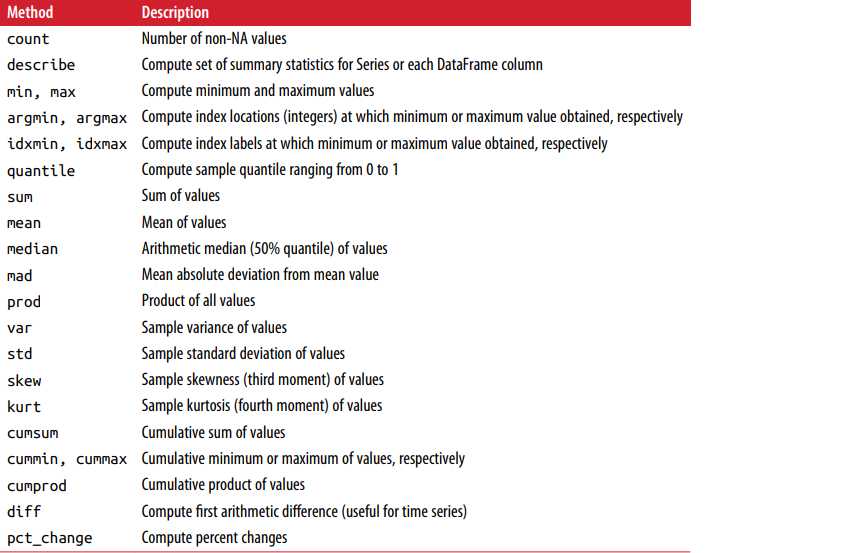